In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
plt.style.use('ggplot')
import math

In [2]:
df = pd.read_excel('E:/jupyter/test/USA umemployment rate 1948-2017.xlsx')

In [3]:
df.head()

,Year,Period,Value
0,1948,M01,3.4
1,1948,M02,3.8
2,1948,M03,4.0
3,1948,M04,3.9
4,1948,M05,3.5


In [4]:
df = df.rename(columns={'Value':'Unemployment Rate'})

In [5]:
df.head()

,Year,Period,Unemployment Rate
0,1948,M01,3.4
1,1948,M02,3.8
2,1948,M03,4.0
3,1948,M04,3.9
4,1948,M05,3.5


In [6]:
date=df.set_index('Year').groupby('Year').mean()

In [7]:
date.head

<bound method NDFrame.head of       Unemployment Rate
Year                   
1948           3.750000
1949           6.050000
1950           5.208333
1951           3.283333
1952           3.025000
...                 ...
2013           7.358333
2014           6.175000
2015           5.266667
2016           4.866667
2017           4.350000

[70 rows x 1 columns]>

In [8]:
data = pd.DataFrame(df['Year'].unique(), columns=['Year'])
data.head()

,Year
0,1948
1,1949
2,1950
3,1951
4,1952


In [9]:
sum=0
avg=[]
n=0
for x in range(len(data)):
    for y in range(n,len(df)):
        if(df['Year'][y] == data['Year'][x]):
            sum += df['Unemployment Rate'][y]
        else:
            avg.append(sum/12)
            n=y
            sum=0
            break
        if(y == 839):
            avg.append((sum/12))

In [10]:
avg[0:5]

[3.75, 6.05, 5.208333333333333, 3.2833333333333337, 3.0250000000000004]

In [11]:
data['Unemployment Rate'] = pd.DataFrame(avg, columns=['Unemployment Rate'])
data['Unemployment Rate'] = data['Unemployment Rate'].round(2)

In [12]:
data.head()

,Year,Unemployment Rate
0,1948,3.75
1,1949,6.05
2,1950,5.21
3,1951,3.28
4,1952,3.03


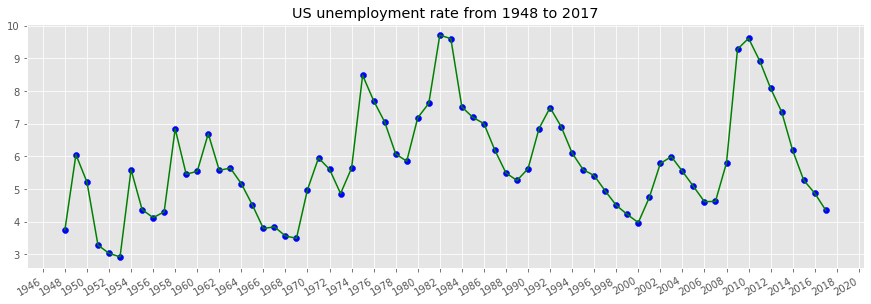

In [13]:
fig,ax = plt.subplots(figsize=(15,5))
ax.scatter(data['Year'], data['Unemployment Rate'], color="blue")
ax.plot(data['Year'], data['Unemployment Rate'], color="green")

ax.locator_params(nbins=70, axis='x')

fig.autofmt_xdate()

plt.title('US unemployment rate from 1948 to 2017')
plt.show()

In [14]:
data['Unemployment Rate'] = np.log(data['Unemployment Rate'])
data.head()

,Year,Unemployment Rate
0,1948,1.321756
1,1949,1.800058
2,1950,1.650580
3,1951,1.187843
4,1952,1.108563


In [15]:
data_set = data['Unemployment Rate'].values

In [16]:
len(data_set)

70

In [17]:
training_set = data_set[:50]

In [18]:
X_train = []
y_train = []
for i in range(30, len(training_set)):
    X_train.append(training_set[i-30:i])
    y_train.append(training_set[i])

In [19]:
test_set = data_set[20:] 
X_test = []
y_test = data_set[50:]
for i in range(30, 50):
    X_test.append(training_set[i-30:i])

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lrm = LinearRegression()

In [22]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
pred_lrm = lrm.predict(X_test)

In [24]:
for i in range(20):
    y_test[i] = math.exp(y_test[i])
    pred_lrm[i] = math.exp(pred_lrm[i])

In [25]:
L20y = data['Year'][50:]

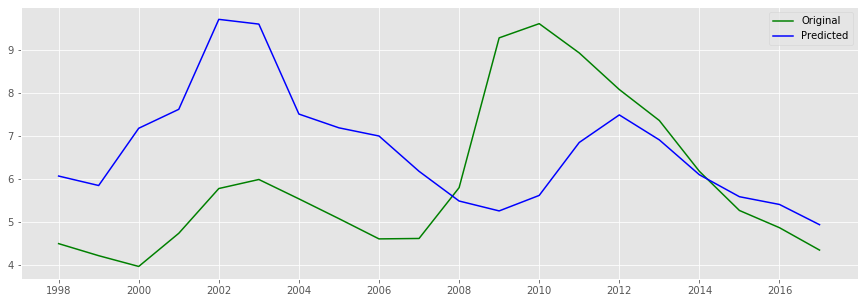

In [27]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='green')
two, = ax.plot(L20y, pred_lrm, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
knn = KNeighborsRegressor(n_neighbors=1)

In [30]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [31]:
pred_knn = knn.predict(X_test)

In [32]:
for i in range(20):
    pred_knn[i] = math.exp(pred_knn[i])

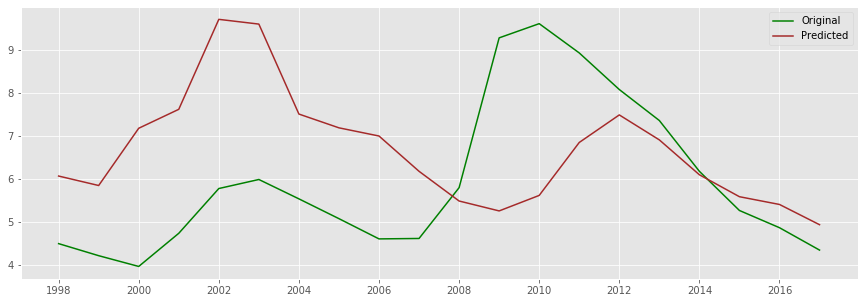

In [34]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='green')
two, = ax.plot(L20y, pred_knn, color='brown')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

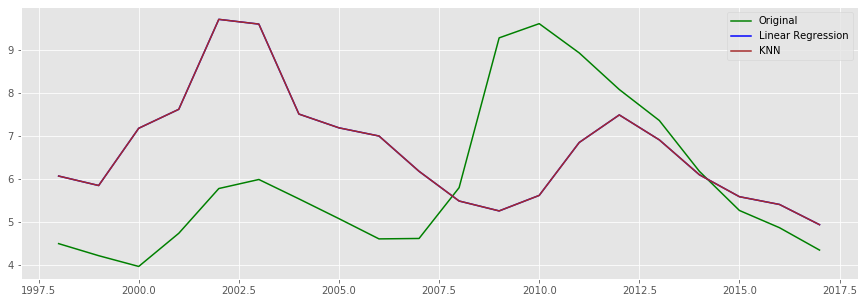

In [36]:
fig,ax = plt.subplots(figsize=(15,5))
a, = ax.plot(L20y, y_test, color='green')
b, = ax.plot(L20y, pred_lrm, color='blue')
c, = ax.plot(L20y, pred_knn, color='brown')
plt.legend([a,b, c],['Original','Linear Regression', 'KNN'])